<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 02  </font></center></h1>
<h2><center> <font color='black'> Regression & Regularization</font></center></h2>    
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Spring 2021</font></center></h2>
</div>

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID. 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close on <font color='red'>**21 March at 23:59**</font>, so please make sure to submit before the deadline. 

- ONLY one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY. 

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues. 

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://www.ut.ee/en/current-students/academic-fraud).


**<h2><font color='red'>Team mates:</font></h2>**


**<font color='red'>Name: Mohga Emam </font>&emsp;   <font color='red'>Student ID: 	C09505 </font>**


**<font color='red'>Name: Rewan Emam </font>&emsp;   <font color='red'>Student ID: 	C07851 </font>**




# Introduction

* In this homework you are going to apply supervised learning: Linear Regression method using Scikit-learn package; Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy [https://en.wikipedia.org/wiki/Scikit-learn].

### The homework is divided into four sections and the points are distributed as below:
<pre>
- Linear Regression    -> 2 points
- PCA                  -> 2 points
- Overfitting          -> 5 points
_________________________________________
Total                  -> 9 points
</pre>

# 1. Regression 
## 1.1 Linear Regression (2 points)

We are going to use the Prices dataset that contains 74 columns. Each column represents a feature of houses for sale. The ```SalePrice``` column  shows their prices. 

In [ ]:
# Recall the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Plot the dataset:
df = pd.read_csv('https://raw.githubusercontent.com/RewanEmam/Regression-Regularization/main/Prices_Last_Updated.csv', sep= ',', index_col=0)
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Embarked_C (all),Embarked_RL,Embarked_RM,Embarked_Pave,...,Embarked_Detchd,Embarked_Maj1,Embarked_Maj2,Embarked_Min1,Embarked_Min2,Embarked_Mod.1,Embarked_Sev.1,Embarked_Typ,Embarked_Ex.5,Embarked_Fa.6,Embarked_Gd.7,Embarked_TA.6,Embarked_Floor,Embarked_GasA,Embarked_GasW,Embarked_Grav,Embarked_OthW,Embarked_Wall,Embarked_Abnorml,Embarked_AdjLand,Embarked_Alloca,Embarked_Family,Embarked_Normal,Embarked_Partial,Embarked_Ex.6,Embarked_Fa.7,Embarked_Gd.8,Embarked_Po.4,Embarked_TA.7,Embarked_N.1,Embarked_Y.1,Embarked_COD,Embarked_CWD,Embarked_Con,Embarked_ConLD,Embarked_ConLI,Embarked_ConLw,Embarked_New,Embarked_Oth,Embarked_WD
MSSubClass,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


The column names are self-explanatory which indicates features of each house.

**1.1.1. The target label is```SalePrice``` which means, later we will predict the sale-price based on the given features (columns). But for regression task, it is important to ensure that the data is not skewed. In order to do that, please plot the distribution of ```SalePrice``` column and explain what do you see. (0.2 point)**

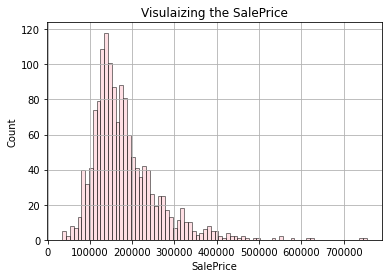

In [ ]:
## The original data is skewed


# Plot the histogram
plt.hist(df.SalePrice, bins = 80, color='pink', ec='black', alpha=0.5)

# Creating some customizations
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title('Visulaizing the SalePrice')
plt.grid(True)
plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 

# Visulaize the plot
plt.show()

**<font color='red'>Answer: Based on the original data that we have, the data is skew. and it repesents the properties of houses based on different factors such as the tear built, the type of properties, the sale conditions, etc. We can say that the SalePrice is the dependent factor "Y" and it depends on several independent factors. In order to fix the skew issue, I have used "Log transform" method and then I tested and the result is: 0.01213350. It is pretty satisfying but I tried different method which is "Square Root Transform" method and it didn't work as I expected. Finally, I have tried "Box-Cox Transform" method, and it turned out that the final method is the best method of all three methods. As the skew dropped to 0.008652.</font>** 

In [ ]:
# Log Transform method:
df_log = np.log(df['SalePrice'])
df_log.skew()

0.12133506220520406

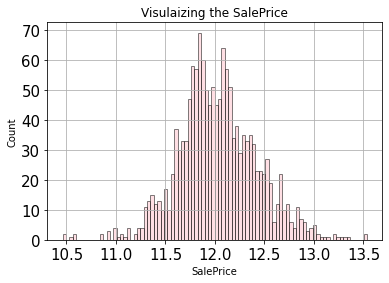

In [ ]:
# Visualize the SalePrice after I have applied Log Transform method:
plt.hist(df_log, bins = 90, color='pink', ec='black', alpha=0.5)

# Creating some customizations
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title('Visulaizing the SalePrice')
plt.grid(True)
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 

# Visulaize the plot
plt.show()

In [ ]:
# Box-Cox Transform method:
df_boxcox = stats.boxcox(df['SalePrice'])[0]
pd.Series(df_boxcox).skew()

-0.008652893640830005

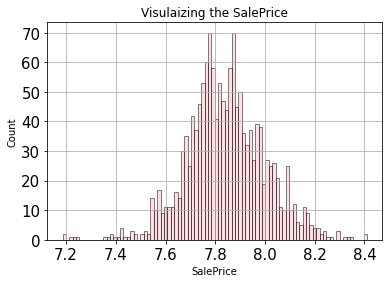

In [ ]:
# Visualize the SalePrice after I have applied Box-Cox Transform method:
plt.hist(df_boxcox, bins = 90, color='pink', ec='black', alpha=0.5)

# Creating some customizations
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title('Visulaizing the SalePrice')
plt.grid(True)
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 

# Visulaize the plot
plt.show()

So, the data seems to be skewed which has to be fixed otherwise it may lead to erronous result. 
Apart from that, look closely, some columns are not numerical. For those, you have to convert them to numerical value or represent them in a way so that the algorithm can understand the data. One of such way is called, one hot encoding. Along with that, the algorithm cannot deal with NaN or Infinite values. So please address all of these in the preprocessing section. 

- Preprocess for skewed data
- Apply one-hot encoding to categorical data types
- Replace negative infinite values with 0

**1.1.2. After preprocessing the skewed data, plot ```SalePrice``` column distribution again. (0.05 point)**

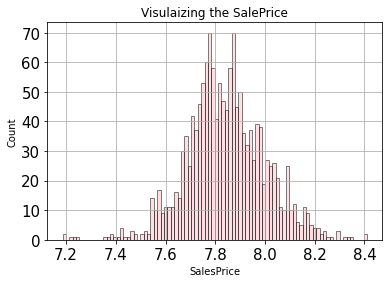

In [ ]:
# Add the new column:
df['SalesPrice'] = df_boxcox

# Visualize the SalePrice after I have applied Box-Cox Transform method:
plt.hist(df['SalesPrice'], bins = 90, color='pink', ec='black', alpha=0.5)

# Creating some customizations
plt.xlabel('SalesPrice')
plt.ylabel('Count')
plt.title('Visulaizing the SalePrice')
plt.grid(True)
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 

# Visulaize the plot
plt.show()

**1.1.3. Calculate the correlation between price and each feature. Which are the top 3 features that have the highest correlation with  price? Is the correlation positive or negative? Explain what happens with the price when each of those 3 features change (consider only one feature at a time) and others are kept constant. (0.25 point)** 



In [ ]:
# Import all the required datasets:
from sklearn.preprocessing import MinMaxScaler # preprocessing
from sklearn.preprocessing import PolynomialFeatures # preprocessing
from sklearn.preprocessing import scale # preprocessing
from sklearn.feature_selection import RFE # preprocessing

# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = ['LotArea', 'YearBuilt', 'SalePrice', 'OverallCond', 'GrLivArea', 'OverallQual', 'LotFrontage']
df[numeric_vars] = scaler.fit_transform(df[numeric_vars])
print(df)

            LotFrontage   LotArea  ...  Embarked_WD  SalesPrice
MSSubClass                         ...                         
60             0.150685  0.033420  ...            1    7.932610
20             0.202055  0.038795  ...            1    7.878263
60             0.160959  0.046507  ...            1    7.959618
70             0.133562  0.038561  ...            1    7.774955
60             0.215753  0.060576  ...            1    8.002875
...                 ...       ...  ...          ...         ...
60             0.140411  0.030929  ...            1    7.863875
20             0.219178  0.055505  ...            1    7.935404
70             0.154110  0.036187  ...            1    8.027382
20             0.160959  0.039342  ...            1    7.781006
20             0.184932  0.040370  ...            1    7.795887

[1460 rows x 271 columns]


In [ ]:
# Compute the correlation between the price & Yearbuilt

SalPrice_SalCond = list(['SalePrice', 'YearBuilt'])
df[SalPrice_SalCond].corr()

,SalePrice,YearBuilt
SalePrice,1.000000,0.522897
YearBuilt,0.522897,1.000000


In [ ]:
# Compute the correlation between the price & OverallCond

SalPrice_OverallCond = list(['SalePrice', 'OverallCond'])
df[SalPrice_OverallCond].corr() 

,SalePrice,OverallCond
SalePrice,1.000000,-0.077856
OverallCond,-0.077856,1.000000


In [ ]:
# Compute the correlation between the price & GrLivArea

SalPrice_GrLivArea = list(['SalePrice', 'GrLivArea'])
df[SalPrice_GrLivArea].corr() 

,SalePrice,GrLivArea
SalePrice,1.000000,0.708624
GrLivArea,0.708624,1.000000


In [ ]:
# Compute the correlation between the price & OverallQual

SalPrice_OverallQual = list(['SalePrice', 'OverallQual'])
df[SalPrice_OverallQual].corr()

,SalePrice,OverallQual
SalePrice,1.000000,0.790982
OverallQual,0.790982,1.000000


In [ ]:
# Compute the correlation between the price & LotFrontage

SalPrice_LotFrontage = list(['SalePrice', 'LotFrontage'])
df[SalPrice_LotFrontage].corr()

,SalePrice,LotFrontage
SalePrice,1.000000,0.351799
LotFrontage,0.351799,1.000000


In [ ]:
# Compute the correlation between the price & LotArea

SalPrice_LotArea = list(['SalePrice', 'LotArea'])
df[SalPrice_LotArea].corr()  

,SalePrice,LotArea
SalePrice,1.000000,0.263843
LotArea,0.263843,1.000000


In [ ]:
corr = {'col_names' : df.loc[:, df.columns != 'SalePrice'].corrwith(df['SalePrice']).keys().tolist(), 'corr_vals': df.loc[:, df.columns != 'SalePrice'].corrwith(df['SalePrice']).values.tolist()}
corrs = pd.DataFrame(corr)  
corrs = corrs.sort_values(by=['corr_vals'],ascending=False).reset_index(drop=True)
corrs

,col_names,corr_vals
0,OverallQual,0.790982
1,GrLivArea,0.708624
2,GarageCars,0.640409
3,GarageArea,0.623431
4,TotalBsmtSF,0.613581
...,...,...
264,Embarked_None,-0.374468
265,Embarked_Unf.2,-0.410608
266,Embarked_TA.2,-0.452394
267,Embarked_TA.6,-0.519298


<font color='red'> **Answer: the top 3 features that have the highest correlation with price are: OverallQual, GrLivArea, and GarageCars. The correlation is positive. Since There's a positive correlation with the price column and the top 3 column so if any values fluctuated the price column will be affected as well.**
</font>

*   <font color='red'>Regarding the OverallQual column: If the values in the OverallQual decreased then the values in the price column will decrease as well which makes sense in the daily life because the higher the house quality the higher the price. The lower the house quality the lower the price.</font>
*   <font color='red'>Regarding the GrLivArea: If the values in the GrLivArea increased the price column values will increase, If it decreased the price value will decrease.</font>
*   <font color='red'>Regarding the GarageCars: If the values in the GarageCars column increased the price column values will increase, If it decreased the price value will decrease.</font>



**1.1.4.  Now you have to build a regression model that would be trained on training data and later predict the price on test data. You are free to select features on which you want train the model. The dataset has missing values, so please apply the following methods for dealing with the missing data in the features of your choice:**

a) mean imputation

b) median imputation

c) mode imputation

d) dropping missing values

**Split dataset into the training (80% of the all rows) and test ( 20% of all rows) set, you can use train_test_split function from scikit-learn. While splitting, set the parameter random_state equal to 2, this will reproduce similar split during grading.**

**For each of the case report MAE, RMSE and R<sup>2</sup>. Which method works better ?(1.50 points)**



In [ ]:
# I choose to apply mean imputation
df.columns[df.isna().any()].tolist() # ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
df['LotFrontage'].fillna(np.mean(df['LotFrontage']), inplace=True)
df['MasVnrArea'].fillna(np.mean(df['MasVnrArea']), inplace=True)
df['GarageYrBlt'].fillna(np.mean(df['GarageYrBlt']), inplace=True)

In [ ]:
# I choose the columns with the highest correlation to the SalePrice
selected_col = df[corrs.col_names.head(10).tolist()]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


methods = ['mean imputation', 'median imputation', 'mode imputation', 'dropping missing values']
#Store the result in the following variables
MAE = []
RMSE = []
R2 = [] 

# Split the dataset into train set & test set:
X = selected_col
y = df['SalePrice']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=2)

regressor = LinearRegression()

#TODO: train the regression model
regressor.fit(X_train, y_train)

y_predicted = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_predicted)
rmse = (np.sqrt(mean_squared_error(y_test, y_predicted)))
r2 = r2_score(y_test, y_predicted)

    
print("MAE: " + str(mae) + "  RMSE: " + str(rmse) + "  R2: " + str(r2))


MAE: 21946.21355087014  RMSE: 30185.553842971687  R2: 0.8624084638882776


<font color='red'> **Answer: The method that works best is the R2 in my opinion and that's because mae and rmse are doing bad job in finding the correct error. I choose the columns that has the highest correlation with the SalePrice column.**</font>

**Please store the best MAE, RMSE, r2_best score in the following variables. We will use these variable to compare ```1.2.7```**

In [ ]:
mae_best = mae    #best MAE
rmse_best = rmse  #best RMSE
r2_best = r2      #best R2

# 1.2 Principal Component Analysis (PCA) (2 points)
Our model performs quite good. But there is always room to make it better and simpler. By simpler, we mean the reducing the dimensionality of the dataset so that we can have a simpler linear regression model. <br> <br>If you noticed after one-hot encoding, we have 270 features (columns) but all these features do not hold the same level of information. For example, the first feature may hold 50% of the information required to make the linear regression acheive the performance we already had; the last, (feature number 270) may contribute to only 0.0000001% to the total output. Hence, adding this last variable (actually there could be more) to our linear regression model (read equation) will only increase the complexity of the model; space, time and computational complexity. Therefore, it is wise and desirable to make the model simpler yet performing the best (better). 
<br> <br>
One such way to reduce the dimensionality of the dataset is known as Pricipal Component Analysis. Using this method, we can find out which features contribute the most in our model, therefore, we can wisely select how many we need. We will perform, PCA in this section of the homework. <br><br>

*There is another powerful method for dimensionality reduction, named t-SNE. We will use t-sne in future homework. <br><br>*



**1.2.1. From ```1.1.4``` keep the best method to deal with missing values and apply PCA to reduce the number of features. (0.5point)**

In [ ]:
df.isnull().any().sum() # make sure there's no null or missing values

0

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = selected_col
y = df['SalePrice']
#TODO: initialize pca, pass, whiten=True, svd_solver='randomized', random_state=0
pca = PCA(whiten=True, svd_solver='randomized', random_state=0)

#TODO: fit pca
pca.fit(X,y)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='randomized', tol=0.0, whiten=True)

In [ ]:
np.var(pca.explained_variance_ratio_[:5])*100

6.769932092405191

**1.2.2. What percentage of the variance is explained by the first five components? (0.10 point)**

<font color='red'> **Answer: The variance percentages is 6.769932092405191% I calculated it by calculating the variance of the first 5 componenets and multiplaying it by 100 to get the percentage.**</font>



It would be helpful if we could see all of the variance against the number of components, so a plot would give us a better understanding of the situation. 

**1.2.3. Please plot the result of PCA you built in ```1.2.1```<br>
X-axis=Number of Components, Y-axis=Total explained variance and explain the result.(0.5 point)**

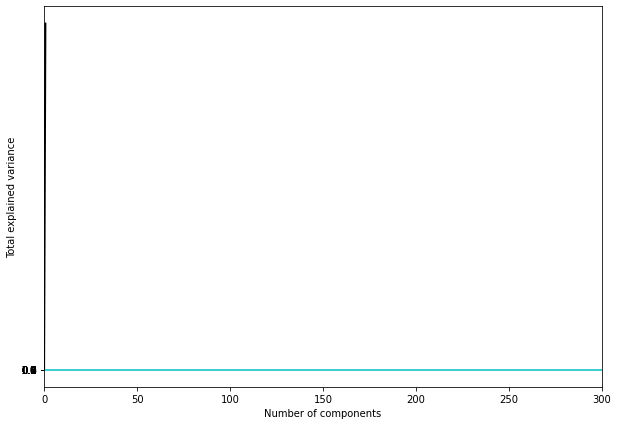

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
lw=2
plt.plot(pca.explained_variance_ratio_,pca.explained_variance_, color='k', lw=lw)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
    
plt.xlim(0, 300)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axhline(0.9, c='c')
plt.show()


<font color='red'> **Answer:**</font>

**1.2.5. Again, from ```1.1.4``` keep the best method to deal with missing values and use PCA to reduce the number of features. But you can use only the number of features that are significant in ```1.1.3```, in this case you have to choose an optimum n_component value based on the PCA plot. Otherwise, you can select all of the features and pass the n_components=37. In all cases, keep random_state for PCA equal to 0. (0.20 points)**

In [ ]:
pca = PCA(n_components= 37,whiten=True, svd_solver='randomized', random_state=0)
pca.get_params

<bound method BaseEstimator.get_params of PCA(copy=True, iterated_power='auto', n_components=37, random_state=0,
    svd_solver='randomized', tol=0.0, whiten=True)>

**1.2.6. Use the new components derived from PCA to predict the house pricing. Keep the ratio of test and train set to 20/80 and the random_state equal to 0. Report MAE, RMSE and R<sup>2</sup> (0.60 point)** <br>
*Hint: Now your training data is different. Please use pca.transform(X) function to create your new training dataset. But make sure you have the fitted pca from ```1.2.5```*

In [ ]:
# pca_X = pca.transform(X)


methods = ['mean imputation', 'median imputation', 'mode imputation', 'dropping missing values']
MAE = []
RMSE = []
R2 = []
    
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size = 0.2, random_state=0)

regressor = LinearRegression()

#TODO: train the regression model
regressor.fit(X_train_pca, y_train_pca)

y_predicted_pca = regressor.predict(X_test_pca)

mae_pca = mean_absolute_error(y_test_pca, y_predicted_pca)
rmse_pca = (np.sqrt(mean_squared_error(y_test_pca, y_predicted_pca)))
r2_pca = r2_score(y_test_pca, y_predicted_pca)

    
print("MAE: " + str(mae_pca) + "  RMSE: " + str(rmse_pca) + "  R2: " + str(r2_pca))


MAE: 24772.97620515129  RMSE: 48904.66493710956  R2: 0.6536753238084512


**1.2.7 The following cell would calculate the difference between pre-PCA and post-PCA. Please explain the situation based on the differences. (0.1 point)**

In [ ]:
print("MAE difference after PCA: ", mae_best-mae_pca)
print("RMSE difference after PCA: ", rmse_best-rmse_pca)
print("R2 difference after PCA: ", r2_best-r2_pca)

MAE difference after PCA:  -2826.762654281152
RMSE difference after PCA:  -18719.111094137876
R2 difference after PCA:  0.20873314007982646


<font color='red'> **Answer: I think that the mean absolute error and mean squared error and the r2 scrore have decresead when we use PCA because PCA calculated them automatically so It's more accurate and what PCA does is dimentionality reduction so I think that helped in decreasing the erorr percentage a lot.**</font>

## 1.3 Overfitting (5 points)

Now our model is comparatively better than the earlier models. It is less complex yet performs the almost the same. Let's dive a little deeper into the model now. In this section, we will check if the model is overfitting. The concept of overfitting has already been delivered in the lectures. However, if you are interesed in honing it up, please take a look here or anywhere you understand better: https://datascience.foundation/sciencewhitepaper/underfitting-and-overfitting-in-machine-learning
<br>
But, unfortunately it is difficult to know if a model is overfitting or underfitting. One way to know more about model's performance is cross-validation. Cross-validation is also used in the hyperparameter searching to find the best performing model in a given scenario.  
We have a few techniques to prevent overfitting and we will focus on 
- 1.3.1 Cross-validation 
    - K-Fold cross-validation: Most common (we would apply this one to see the performance of the Linear regression model)
    - Leave One Out (LOO): Takes each row as the validation set for once, and trains the model on the rest n-1 rows. Thus, it trains n number of models.

    - Leave P-Out (LPO): Creates possible splits after leaving p samples out. For n rows, there would be (nCp) possibile train-test splits.
    - (For classification problems) Stratified K-Fold: Ensures relative class proportion is preserved in each train and validation fold. Important when the class label is imbalanced (e.g. 95% label: 1; 5% label: 0).
    
    *The last three techniques will be discussed in detail in the 7th Lecture.* <br><br>
    
- 1.3.2 Regularization 
    - L1 (Lasso)    
    - L2 (Ridge)



**1.3.0. Now we have to check if the trained regression model in ```1.1.4``` is overfitting. Please use R<sup>2</sup> value on train and test result to determine the overfitting. Please explain the result from the perspective of the dataset and the value(0.2 point)**

In [ ]:
X = df.loc[:, df.columns != 'SalePrice']
y = df['SalePrice']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predicted = regressor.predict(X_test)
r2 = r2_score(y_test, y_predicted)
print("rscore: ",r2)
print("MAE: ",mean_absolute_error(y_test, y_predicted) )

rscore:  -558325.7358365107
MAE:  7107647.680854301


<font color='red'> **Answer: I think there's an underfitting in the data but this may be due to something in the data preprocessing phase or something in my model.**</font>

**1.3.1 Please apply K-fold=10 fold closs validation on the training dataset of ```1.1.4``` Keep random_state=1, shuffle=True, while performing cross validation, make sure that return_train_score=True.(0.5 point)**


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from numpy import mean
from numpy import std

cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
#TODO: create model
lm = LinearRegression()

#TODO: evaluate model using R^2, and MSE as evaluation metrics
#While setting MSE metrics, make sure you pass the right keyword 
scores = cross_validate(lm, X, y, cv=3,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
scores 

# report performance
print('R^2: %.3f (%.3f)' % (mean(scores['test_r2']), std(scores['test_r2'])))
print('MSE: %.3f (%.3f)' % (mean(scores['test_neg_mean_squared_error']), std(scores['test_neg_mean_squared_error'])))

R^2: 0.822 (0.058)
MSE: -1120470950.926 (348190877.273)


**1.3.1.2. Please plot the training and test R<sup>2</sup> value where X-axis=number of folds, Y-axis=R<sup>2</sup> value. Explain the plot, if the model shows overfitting or not.(0.3 point)**

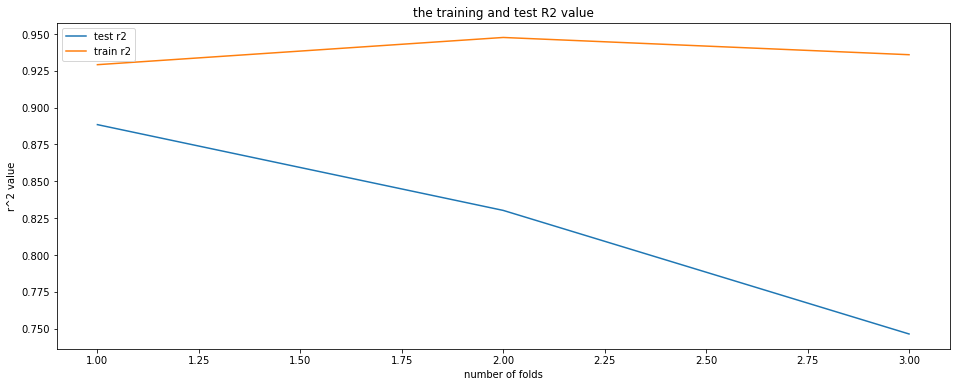

In [ ]:
plt.figure(figsize=(16,6))
#TODO: plot the trendlines ['test_r2'] train_r2
plt.plot([1,2,3], scores['test_r2']);
plt.plot([1,2,3], scores['train_r2']);
plt.xlabel('number of folds');
plt.ylabel('r^2 value');
plt.title("the training and test R2 value");
plt.legend(['test r2', 'train r2'], loc='upper left');

<font color='red'> **Answer: I think that the model is overfitting because it does well on the trainging data and not so well on the test data. we have trained the model so much to the point that it doesn't LEARN rather than memorize the data so when we test it on the test data it applies the memorization not the learning and that's why it's overfitting.**</font>

**1.3.2  Please apply L1 (Lasso) regularization with variable alpha parameters and report the corresponding alpha value and R<sup>2</sup> value. Use the training split from ```1.1.4``` (1.5 point)**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.linear_model import Lasso, Ridge


cross_val_scores_lasso = [] 
  
# List to maintain the different values of alpha 
alpha = [] 



# Loop to for different alpha value 
for i in range(1, 9):
    #TODO: formulate the lasso model where alpha=i * 0.0001
    lassoModel = Lasso(alpha = i * 0.0001,)  
    #TODO: fit the lasso model on whole X, y
    #TODO: perform 10 fold cross validation and store the result in score variable
    lassoModel.fit(X_train, y_train) 
    scores = cross_val_score(lassoModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    alpha.append(i * 0.0001)  
  
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i])) 
    
    


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218557811700.4933, tolerance: 726904594.7462255
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295285940878.124, tolerance: 852398977.1246127
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288871873786.2016, tolerance: 827439703.8697119
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291539076148.

0.0001 : 82.658544441893
0.0002 : 82.65858409181608
0.00030000000000000003 : 82.65862341843138
0.0004 : 82.65866340329279
0.0005 : 82.65870370101695
0.0006000000000000001 : 82.6587439641418
0.0007 : 82.65878482023616
0.0008 : 82.65882432777548


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289130251785.58984, tolerance: 843859692.9252497
  positive)


**1.3.3. Take the best alpha value from ```1.3.2``` and use it to train a new lasso model and report the  R<sup>2</sup> value on test set. Use the train test split from ```1.1.4```. (0.5 point)**

In [ ]:
# Building and fitting the Lasso Regression Model 
from sklearn.model_selection import train_test_split
lassoModelBest = Lasso(alpha = 0.0008,)
#TODO: Fit the model again 
lassoModelBest.fit(X_train, y_train)

# Evaluating the Lasso Regression model 
print(lassoModelBest.score(X_test, y_test)) 

0.8105075790702908


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218544344677.02847, tolerance: 726904594.7462255
  positive)


**1.3.4.  Please apply L2 (Ridge) regularization with variable alpha parameters and report the corresponding alpha value and R<sup>2</sup> value. Use the training split from ```1.1.4``` (1.5 point)**

N.B. The $alpha$ here in the ridge regularization is the same as $lambda$ you saw in the lecture. We did not initiate the variable with $lambda$ because $lambda$ is a reserved keyword in python which is used to create small anonymous functions. A $lambda$ function can take any number of arguments, but can only have one expression.
You can read more about it here: https://www.w3schools.com/python/ref_keyword_lambda.asp#:~:text=The%20lambda%20keyword%20is%20used,and%20the%20result%20is%20returned.

In [ ]:
cross_val_scores_ridge = [] 
  
# List to maintain the different values of alpha 
alpha = [] 



# Loop to for different alpha value 
for i in range(1, 9): 
    #TODO: formulate the ridge model where alpha=i * 0.0001
    ridgeModel = Ridge(alpha = i * 0.0001)
    #TODO: fit the ridge model on whole X, y
    #TODO: perform 10 fold cross validation and store the result in score variable
    ridgeModel.fit(X_train, y_train) 
    scores = cross_val_score(ridgeModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.0001) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 
    
    


0.0001 : 82.01137476598058
0.0002 : 82.01283818605987
0.00030000000000000003 : 82.01430012855961
0.0004 : 82.01576059593442
0.0005 : 82.01721959065097
0.0006000000000000001 : 82.01867711517228
0.0007 : 82.02013317193128
0.0008 : 82.02158776339272


**1.3.5. Take the best alpha value from ```1.3.4``` and use it to train a new ridge model and report the  R<sup>2</sup> value on test set. Use the train test split from ```1.1.4```. (0.5 point)**

In [ ]:
# Building and fitting the Ridge Regression Model 0.0008
from sklearn.model_selection import train_test_split
ridgeModelBest = Ridge(alpha = 0.0008)

#TODO: Fit the model again 
ridgeModelBest.fit(X_train, y_train)
# Evaluating the ridge Regression model 
print(ridgeModelBest.score(X_test, y_test)) 

0.8084684079441264


## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.



**<font color='red'>(please change X in the next cell into your estimate)</font>**

<font color='red'> **Answer:**</font> X hours

## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:**</font>